# Procesamiento

In [1]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt

## Discriminación de señales

In [2]:
# Functions
class Point:
    
    def __init__(self, index, value):
        self.index = index
        self.value = value
    
    def getIndex(self):
        return int(self.index)
    
def posicionMagnitudMaxima(y):
    '''
    Position of y that has maximum value
    '''
    nMax=0
    fMax=y[0]
    for i in range(len(y)-1):
        if y[i+1]>fMax:
            fMax=y[i+1]
            nMax=i+1
    
    return nMax

def maximosY(y):
    '''
    Máximos de Y
    '''
    list_maximos = []
    dy = np.diff(y)
    for i in range(1,len(dy)-1):
        if dy[i-1]>0 and  dy[i]<0 :
            #abs_dy = np.absolute(dy[i-1:i+1])
            #list_maximos.append(Point(i,np.max(abs_dy)*y[i]))
            list_maximos.append(Point(i,y[i]))
    # thank to: https://stackoverflow.com/questions/403421/how-do-i-sort-a-list-of-objects-based-on-an-attribute-of-the-objects
    # Manda la lista ordenada de manera descendente
    return sorted(list_maximos, key=lambda x: x.value, reverse=True)

In [3]:
# 12 to 16 breaths per minute
f_r = 14/60 # [Hz] respiration rate 
# Pulse rate 60 to 100 beats per minute
f_h = 80/60 # [Hz] heart rate

# f_s maximum  61.44 MS/s https://www.ettus.com/wp-content/uploads/2019/01/USRP_B200mini_Data_Sheet-1.pdf 
f_s = 1e3 # [Hz] sample frequency

# Time definition

t_max = 8 # seconds
t = np.linspace(0,t_max, int(t_max*f_s)) # time vector

# Signal models
s_h = np.cos(2*np.pi*f_h*t) # Heart
s_r = 10*np.cos(2*np.pi*f_r*t) # Respiration


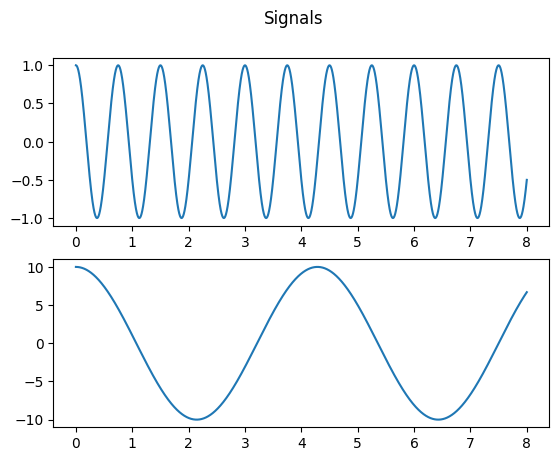

In [4]:
fig, axs = plt.subplots(2)
fig.suptitle('Signals')
axs[0].plot(t, s_h)
axs[1].plot(t, s_r)
plt.show(True)

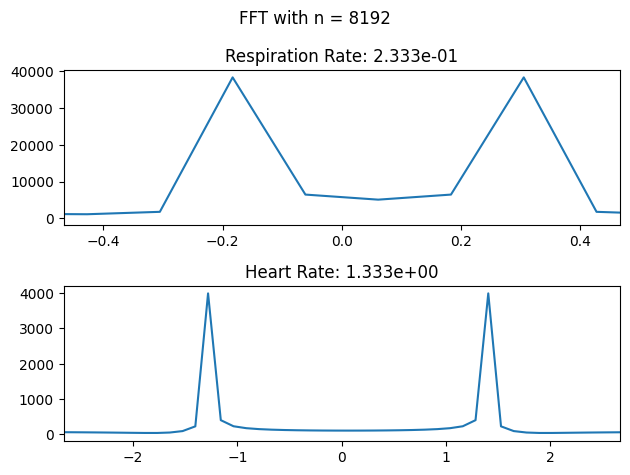

Heart Rate Calculate 1.404e+00, Rerr = 5.30 %
Respiration Rate Calculate 3.052e-01, Rerr = 30.81 %


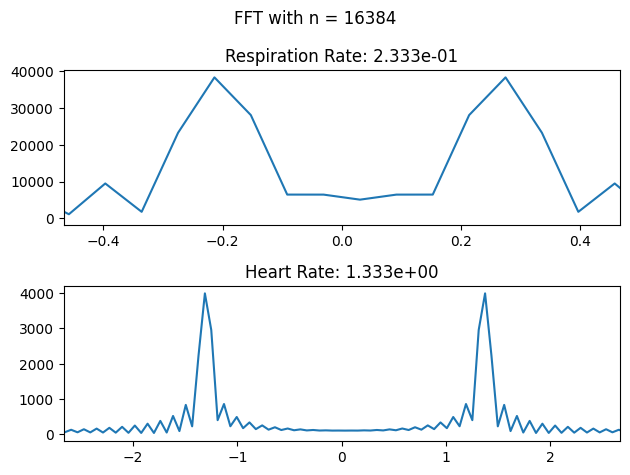

Heart Rate Calculate 1.373e+00, Rerr = 3.00 %
Respiration Rate Calculate 2.747e-01, Rerr = 17.72 %


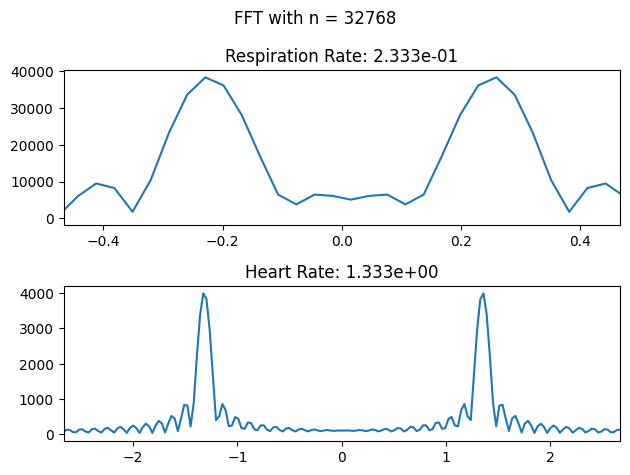

Heart Rate Calculate 1.358e+00, Rerr = 1.86 %
Respiration Rate Calculate 2.594e-01, Rerr = 11.17 %


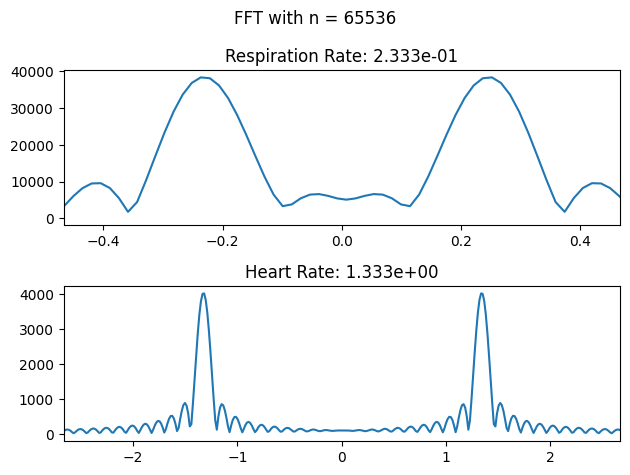

Heart Rate Calculate 1.335e+00, Rerr = 0.14 %
Respiration Rate Calculate 2.518e-01, Rerr = 7.90 %


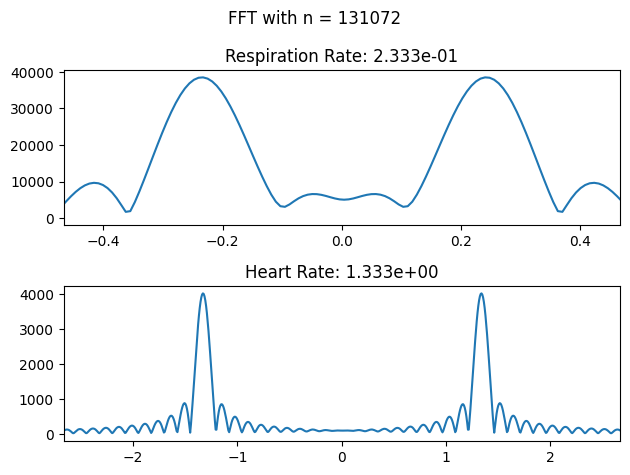

Heart Rate Calculate 1.339e+00, Rerr = 0.42 %
Respiration Rate Calculate 2.403e-01, Rerr = 3.00 %


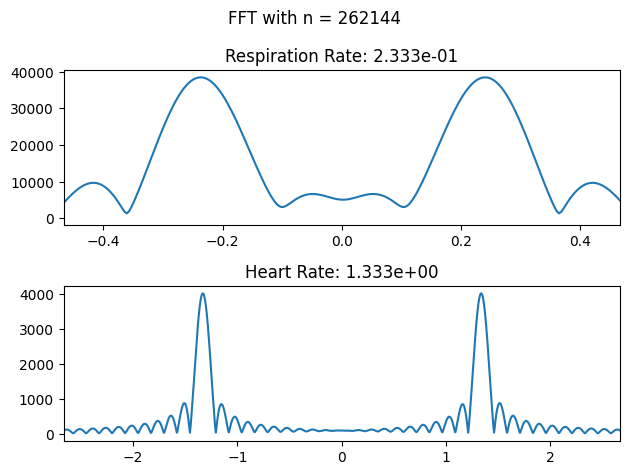

Heart Rate Calculate 1.337e+00, Rerr = 0.28 %
Respiration Rate Calculate 2.422e-01, Rerr = 3.81 %


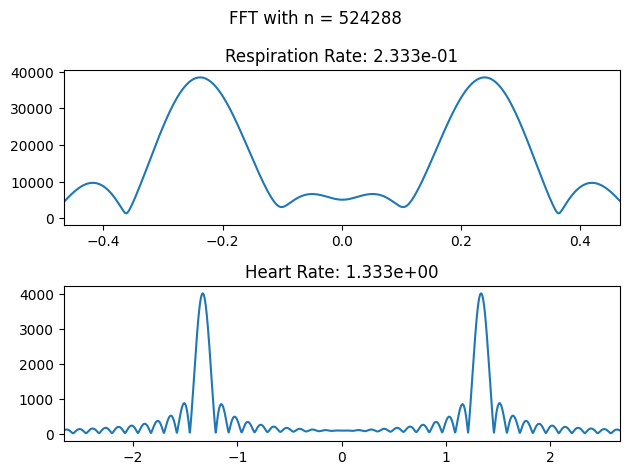

Heart Rate Calculate 1.334e+00, Rerr = 0.06 %
Respiration Rate Calculate 2.394e-01, Rerr = 2.59 %


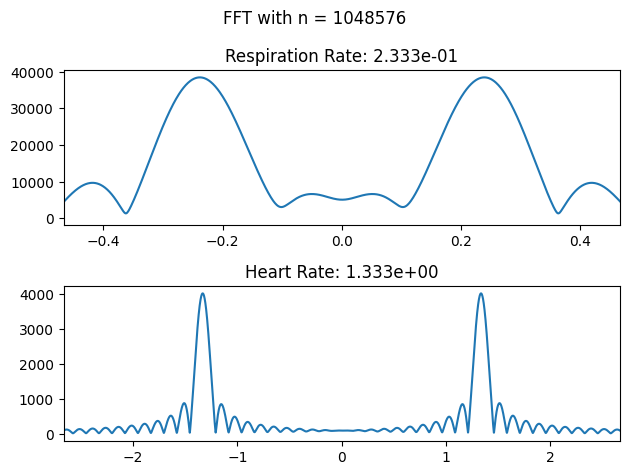

Heart Rate Calculate 1.335e+00, Rerr = 0.10 %
Respiration Rate Calculate 2.389e-01, Rerr = 2.38 %


In [5]:
# FFT algorithm
for n in range(int(np.ceil(np.log2(len(t)))),20+1,1):
    
    N = 2**n
    S_R = np.fft.fft(s_r,n=N)
    S_R_SHIFT = np.absolute( np.fft.fftshift(S_R) )
    S_H = np.fft.fft(s_h,n=N)
    S_H_SHIFT = np.absolute( np.fft.fftshift(S_H) )

    f = np.linspace(-f_s/2,f_s/2,len(S_H))

    fig, axs = plt.subplots(2)
    fig.suptitle(f'FFT with n = {N}')
    axs[0].plot(f, S_R_SHIFT)
    axs[0].set_xlim([-2*f_r,2*f_r])
    axs[0].set_title(f"Respiration Rate: {f_r:.3e}")
    axs[1].plot(f, S_H_SHIFT)
    axs[1].set_xlim([-2*f_h,2*f_h])
    axs[1].set_title(f"Heart Rate: {f_h:.3e}")
    fig.tight_layout()
    plt.show(True)

    # Find Frequencies
    N_half = int(N/2)
    n_max = posicionMagnitudMaxima(S_H_SHIFT[N_half:N])  + N_half
    f_h_c = f[n_max]
    R_err = (f_h_c/f_h -1)*100
    print(f'Heart Rate Calculate {f_h_c:.3e}, Rerr = {R_err:.2f} %') 

    n_max = posicionMagnitudMaxima(S_R_SHIFT[N_half:N])  + N_half
    f_r_c = f[n_max]
    R_err = (f_r_c/f_r -1)*100
    print(f'Respiration Rate Calculate {f_r_c:.3e}, Rerr = {R_err:.2f} %')


### Análisis de las señales por individuales

- Se pueden sacar la frecuencia cardiaca con errores relativos bajos al aumentar en Padding al entero más próximo superior que sea potencia de 2.

- La frecuencia respiratoria puede ser obtenida luego con precisiones de 3 % al tener un padding complementario de 2^17.

Nota: 

- Analizar aplicar una Hanning Window y zero-padding (NFFT=$2^{15}$ Profesor Baer en su ejercicio ) antes de aplicar la fft. Con esto espero que se disminuyan los lóbulos laterales.



### Aplicación de Ventanas

#### Hanning



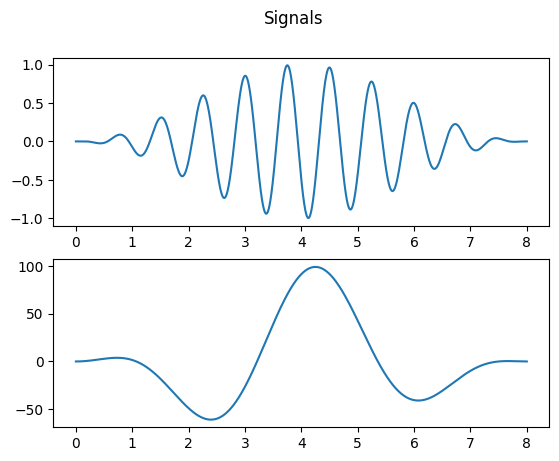

In [6]:
# Signal models
s_h_hanning = np.cos(2*np.pi*f_h*t)*np.hanning(len(t)) # Heart
s_r_hanning = 100*np.cos(2*np.pi*f_r*t)*np.hanning(len(t)) # Respiration
fig, axs = plt.subplots(2)
fig.suptitle('Signals')
axs[0].plot(t, s_h_hanning)
axs[1].plot(t, s_r_hanning)
plt.show(True)


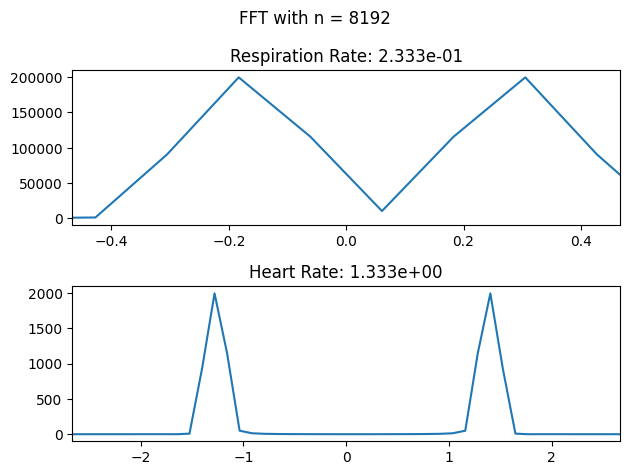

Heart Rate Calculate 1.404e+00, Rerr = 5.30 %
Respiration Rate Calculate 3.052e-01, Rerr = 30.81 %


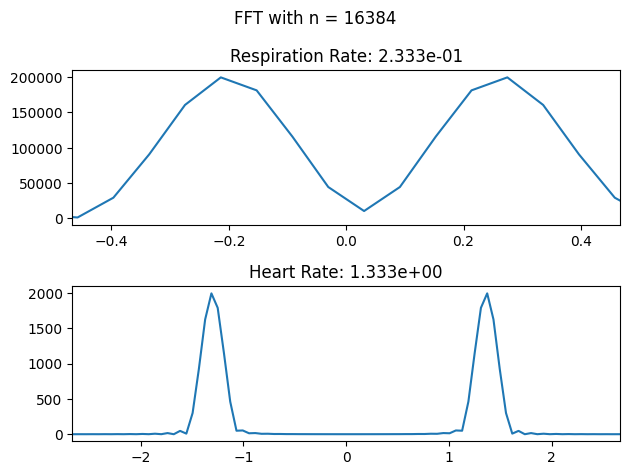

Heart Rate Calculate 1.373e+00, Rerr = 3.00 %
Respiration Rate Calculate 2.747e-01, Rerr = 17.72 %


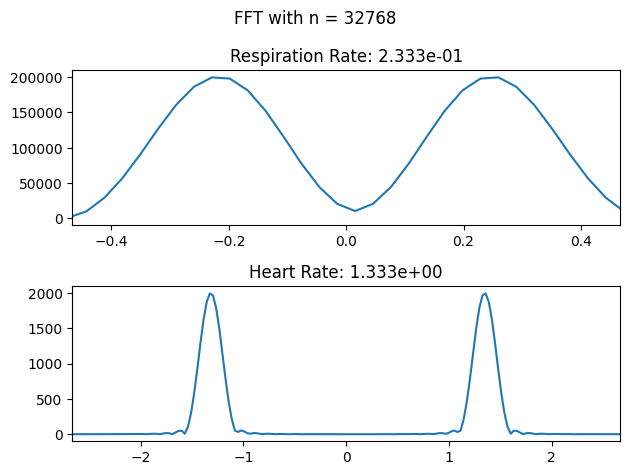

Heart Rate Calculate 1.358e+00, Rerr = 1.86 %
Respiration Rate Calculate 2.594e-01, Rerr = 11.17 %


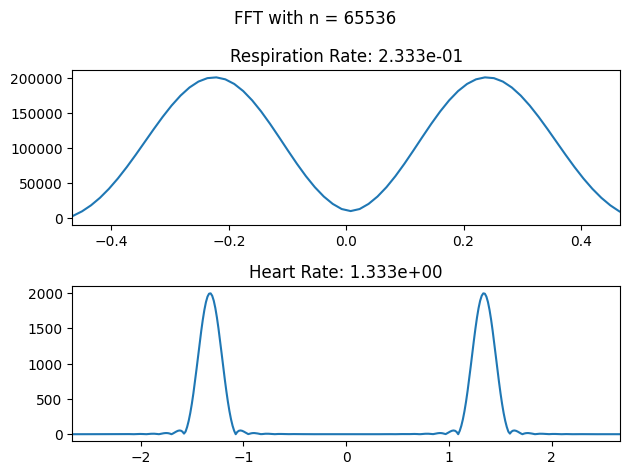

Heart Rate Calculate 1.335e+00, Rerr = 0.14 %
Respiration Rate Calculate 2.365e-01, Rerr = 1.36 %


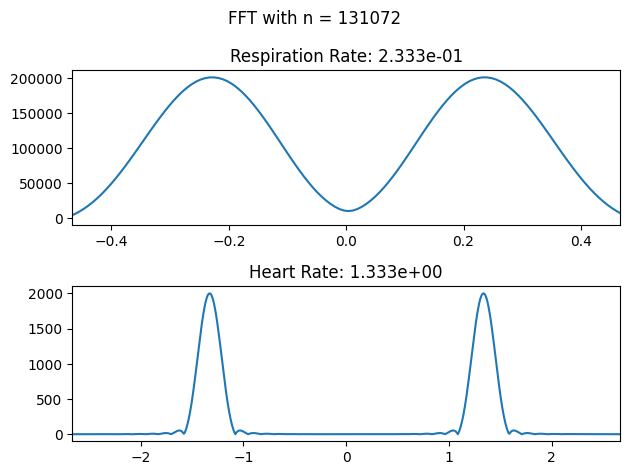

Heart Rate Calculate 1.339e+00, Rerr = 0.42 %
Respiration Rate Calculate 2.327e-01, Rerr = -0.27 %


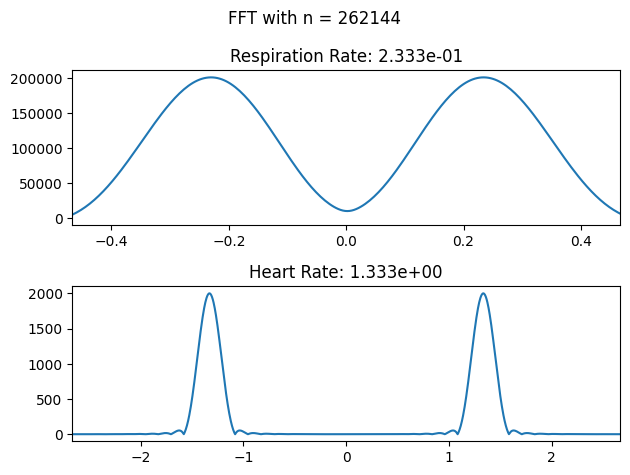

Heart Rate Calculate 1.337e+00, Rerr = 0.28 %
Respiration Rate Calculate 2.346e-01, Rerr = 0.54 %


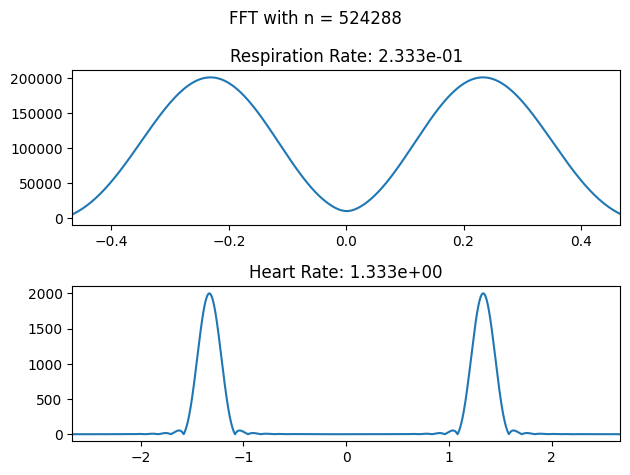

Heart Rate Calculate 1.334e+00, Rerr = 0.06 %
Respiration Rate Calculate 2.337e-01, Rerr = 0.14 %


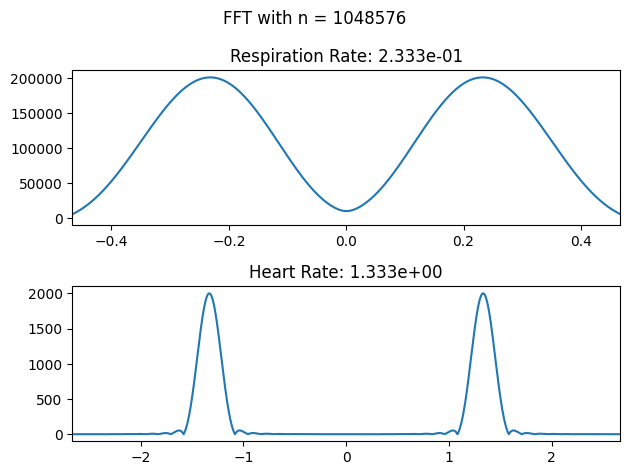

Heart Rate Calculate 1.334e+00, Rerr = 0.03 %
Respiration Rate Calculate 2.322e-01, Rerr = -0.48 %


In [7]:
# FFT algorithm
for n in range(int(np.ceil(np.log2(len(t)))),20+1,1):
    
    N = 2**n
    S_R = np.fft.fft(s_r_hanning,n=N)
    S_R_SHIFT = np.absolute( np.fft.fftshift(S_R) )
    S_H = np.fft.fft(s_h_hanning,n=N)
    S_H_SHIFT = np.absolute( np.fft.fftshift(S_H) )

    f = np.linspace(-f_s/2,f_s/2,len(S_H))

    fig, axs = plt.subplots(2)
    fig.suptitle(f'FFT with n = {N}')
    axs[0].plot(f, S_R_SHIFT)
    axs[0].set_xlim([-2*f_r,2*f_r])
    axs[0].set_title(f"Respiration Rate: {f_r:.3e}")
    axs[1].plot(f, S_H_SHIFT)
    axs[1].set_xlim([-2*f_h,2*f_h])
    axs[1].set_title(f"Heart Rate: {f_h:.3e}")
    fig.tight_layout()
    plt.show(True)

    # Find Frequencies
    N_half = int(N/2)
    n_max = posicionMagnitudMaxima(S_H_SHIFT[N_half:N])  + N_half
    f_h_c = f[n_max]
    R_err = (f_h_c/f_h -1)*100
    print(f'Heart Rate Calculate {f_h_c:.3e}, Rerr = {R_err:.2f} %') 

    n_max = posicionMagnitudMaxima(S_R_SHIFT[N_half:N])  + N_half
    f_r_c = f[n_max]
    R_err = (f_r_c/f_r -1)*100
    print(f'Respiration Rate Calculate {f_r_c:.3e}, Rerr = {R_err:.2f} %')


#### Análisis

Es increible el cambio, con $2^16$ se tiene buena resolución y errores de menos del 3%.

### Suma de señales

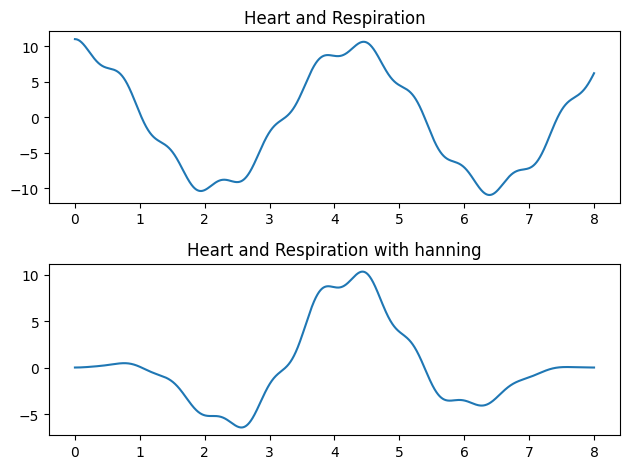

In [8]:
s_t = s_h + s_r
s_t_hanning = s_t * np.hanning(len(s_t))
fig, axs = plt.subplots(2)
axs[0].plot(t, s_t)
axs[0].set_title("Heart and Respiration")
axs[1].plot(t, s_t_hanning)
axs[1].set_title("Heart and Respiration with hanning")
fig.tight_layout()
plt.show(True)

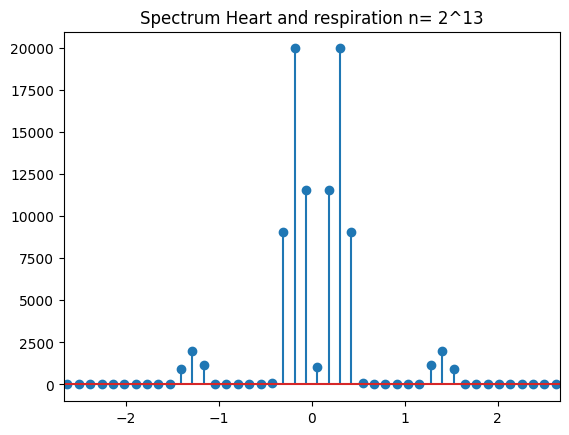

Respiration Rate Calculate 3.052e-01, Rerr = 30.81 %
Heart Rate Calculate 1.404e+00, Rerr = 5.30 %


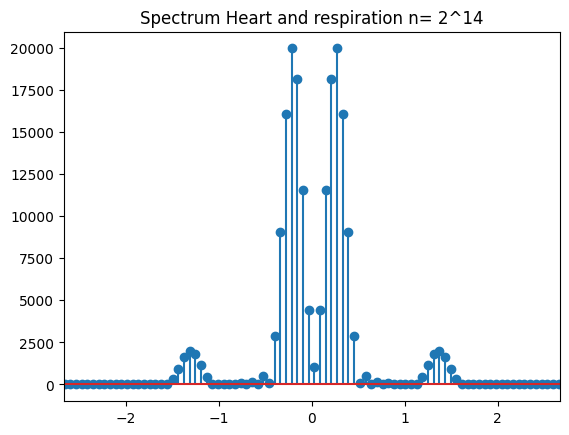

Respiration Rate Calculate 2.747e-01, Rerr = 17.72 %
Heart Rate Calculate 1.373e+00, Rerr = 3.00 %


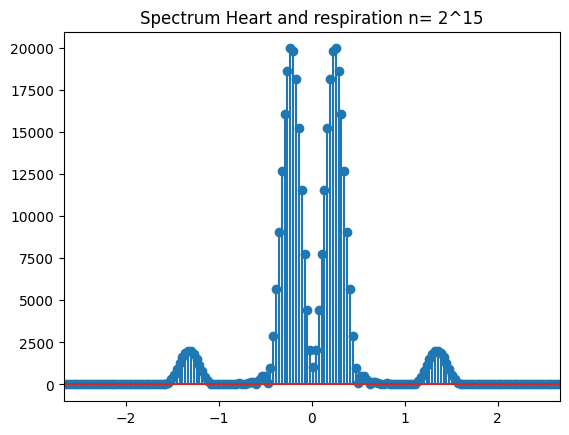

Respiration Rate Calculate 2.594e-01, Rerr = 11.17 %
Heart Rate Calculate 1.358e+00, Rerr = 1.86 %


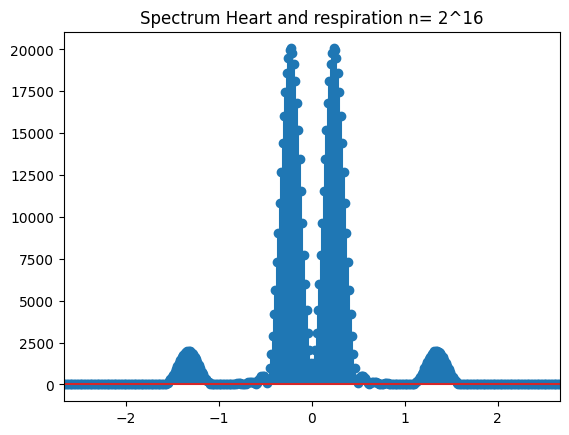

Respiration Rate Calculate 2.365e-01, Rerr = 1.36 %
Heart Rate Calculate 1.335e+00, Rerr = 0.14 %


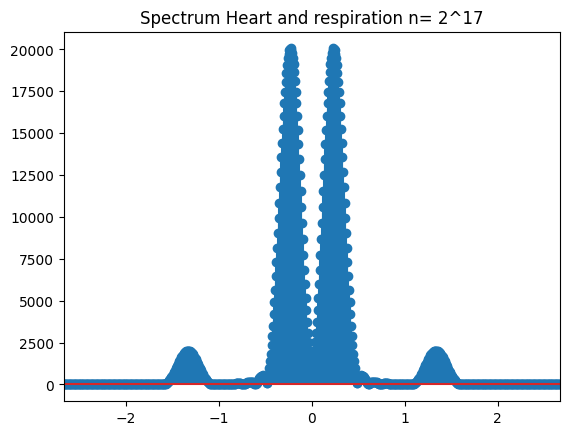

Respiration Rate Calculate 2.327e-01, Rerr = -0.27 %
Heart Rate Calculate 1.339e+00, Rerr = 0.42 %


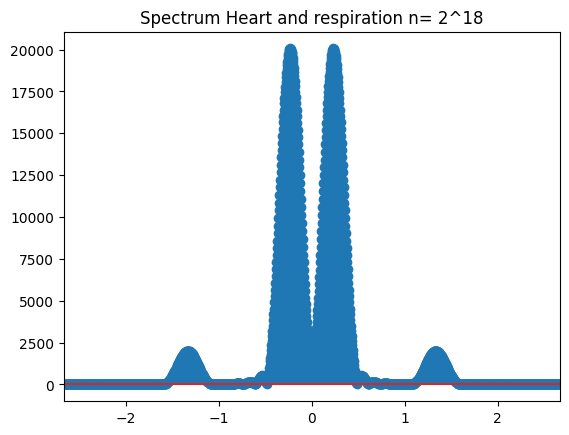

Respiration Rate Calculate 2.346e-01, Rerr = 0.54 %
Heart Rate Calculate 1.333e+00, Rerr = -0.01 %


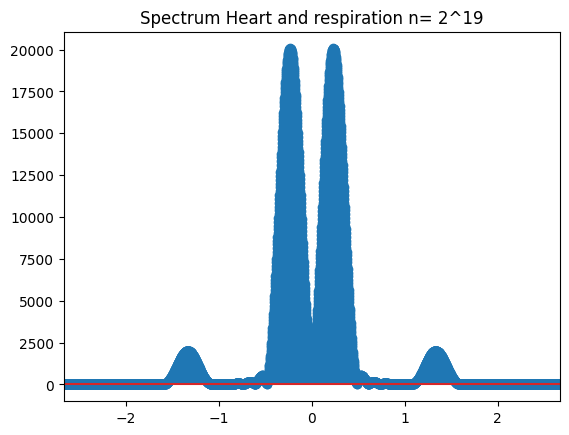

Respiration Rate Calculate 2.337e-01, Rerr = 0.14 %
Heart Rate Calculate 1.334e+00, Rerr = 0.06 %


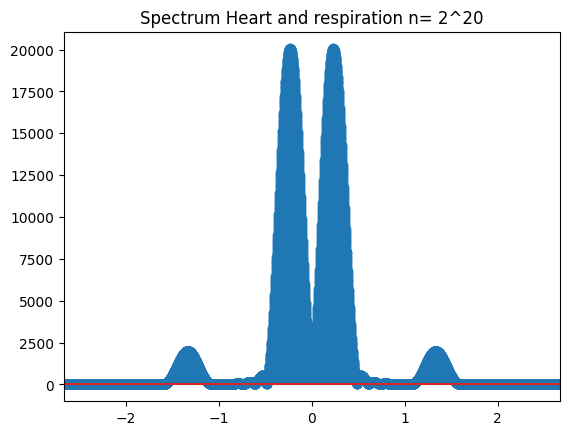

Respiration Rate Calculate 2.322e-01, Rerr = -0.48 %
Heart Rate Calculate 1.333e+00, Rerr = -0.04 %


In [9]:
for n in range(int(np.ceil(np.log2(len(t)))),20+1,1):

    N = 2**n
    S_T = np.fft.fft(s_t_hanning,n=N)
    S_T_SHIFT = np.absolute( np.fft.fftshift(S_T) )
    f = np.linspace(-f_s/2,f_s/2,len(S_T))

    plt.figure()
    plt.stem(f, S_T_SHIFT)
    plt.title(f"Spectrum Heart and respiration n= 2^{n}")
    plt.xlim([-2*max(f_h,f_r),2*max(f_h,f_r)])
    plt.show(True)
    
    maximos_calculados = maximosY(S_T_SHIFT)
    numero_maximos = 2
    list_maximos = []

    for i in range(numero_maximos*2):
        auxf = f[maximos_calculados[i].getIndex()]
        if auxf>0:
            list_maximos.append(auxf)

    f_r_c = min(list_maximos)
    R_err = (f_r_c/f_r -1)*100
    print(f'Respiration Rate Calculate {f_r_c:.3e}, Rerr = {R_err:.2f} %')

    f_h_c = max(list_maximos)
    R_err = (f_h_c/f_h -1)*100
    print(f'Heart Rate Calculate {f_h_c:.3e}, Rerr = {R_err:.2f} %') 




### Caso extremo Señal de Respiración es 100 veces mayor que la cardiaca.


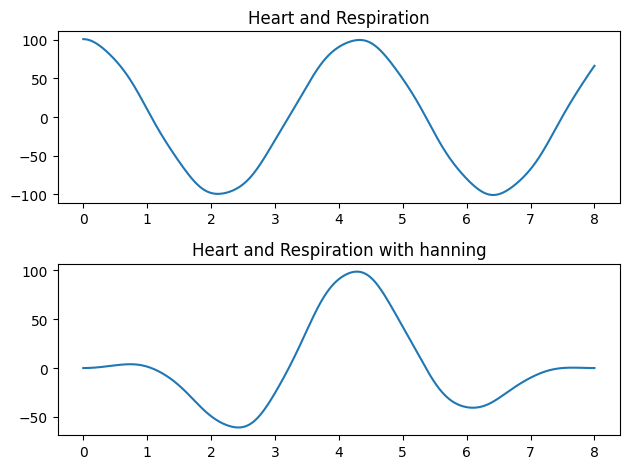

In [12]:
# Signal models
s_h = 1*np.cos(2*np.pi*f_h*t) # Heart
s_r = 100*np.cos(2*np.pi*f_r*t) # Respiration

s_t = s_h + s_r
s_t_hanning = s_t * np.hanning(len(s_t))
fig, axs = plt.subplots(2)
axs[0].plot(t, s_t)
axs[0].set_title("Heart and Respiration")
axs[1].plot(t, s_t_hanning)
axs[1].set_title("Heart and Respiration with hanning")
fig.tight_layout()
plt.show(True)

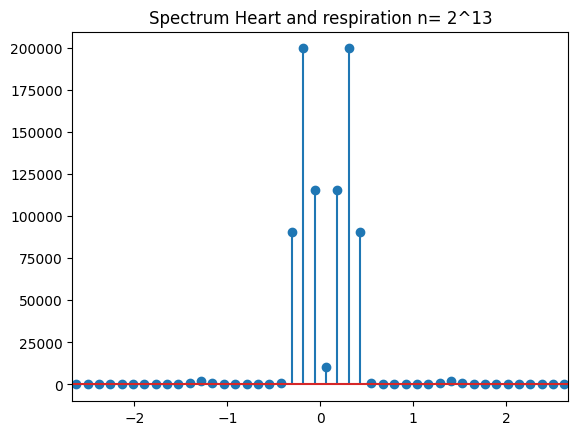

Respiration Rate Calculate 3.052e-01, Rerr = 30.81 %
Heart Rate Calculate 1.404e+00, Rerr = 5.30 %


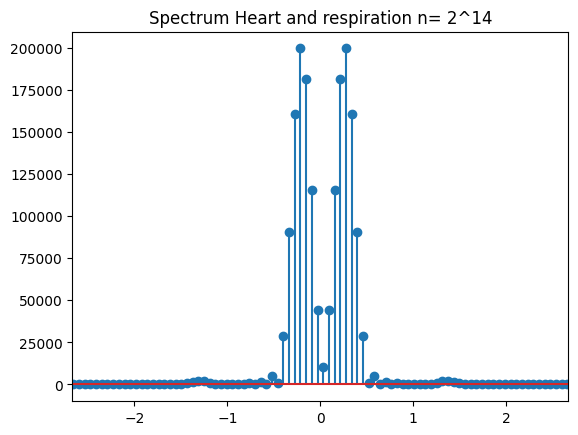

Respiration Rate Calculate 2.747e-01, Rerr = 17.72 %
Heart Rate Calculate 5.799e-01, Rerr = -56.51 %


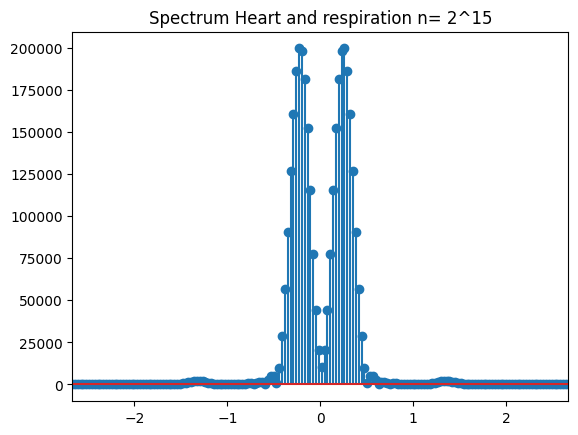

Respiration Rate Calculate 2.594e-01, Rerr = 11.17 %
Heart Rate Calculate 5.341e-01, Rerr = -59.94 %


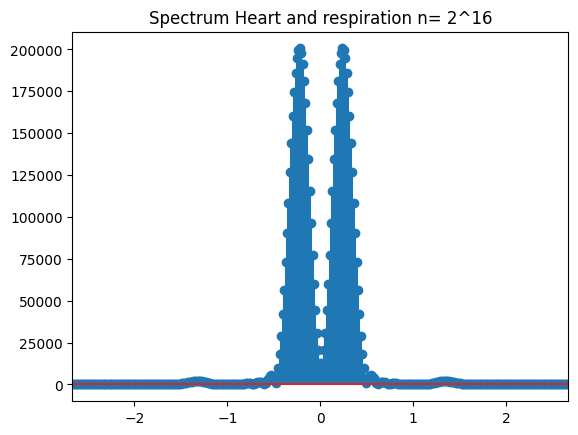

Respiration Rate Calculate 2.365e-01, Rerr = 1.36 %
Heart Rate Calculate 5.417e-01, Rerr = -59.37 %


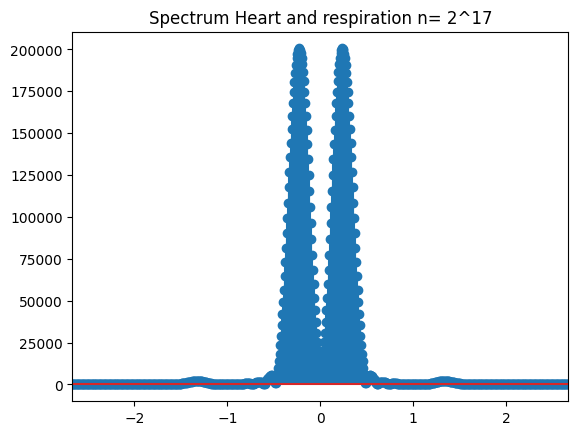

Respiration Rate Calculate 2.327e-01, Rerr = -0.27 %
Heart Rate Calculate 5.302e-01, Rerr = -60.23 %


In [14]:
for n in range(int(np.ceil(np.log2(len(t)))),17+1,1):

    N = 2**n
    S_T = np.fft.fft(s_t_hanning,n=N)
    S_T_SHIFT = np.absolute( np.fft.fftshift(S_T) )
    f = np.linspace(-f_s/2,f_s/2,len(S_T))

    plt.figure()
    plt.stem(f, S_T_SHIFT)
    plt.title(f"Spectrum Heart and respiration n= 2^{n}")
    plt.xlim([-2*max(f_h,f_r),2*max(f_h,f_r)])
    plt.show(True)
    
    maximos_calculados = maximosY(S_T_SHIFT)
    numero_maximos = 2
    list_maximos = []

    for i in range(numero_maximos*2):
        auxf = f[maximos_calculados[i].getIndex()]
        if auxf>0:
            list_maximos.append(auxf)

    f_r_c = min(list_maximos)
    R_err = (f_r_c/f_r -1)*100
    print(f'Respiration Rate Calculate {f_r_c:.3e}, Rerr = {R_err:.2f} %')

    f_h_c = max(list_maximos)
    R_err = (f_h_c/f_h -1)*100
    print(f'Heart Rate Calculate {f_h_c:.3e}, Rerr = {R_err:.2f} %') 




#### Conclusiones

- Al usar una ventana Hanning los lóbulos laterales no crecen significativamente y se pueden discriminar las dos señales perfectamente hasta un padding de $2^{16}$.

- En las mismas condiciones pero con diferencias relativas de 1/100 no se recomienda usar padding para extraer la señal con menos intensidad (ritmo cardiaco). Al sacar la señal como menos intensidad se puede aumentar el padding hasta $2^16$ para extraér con mayor presición la frecuencia de la señal más lenta (respiración).